In [11]:
# Q1.0 Dataset Generation
import numpy as np
import pandas as pd
import hashlib

# Replace this with your name or ID
username = 'Mayuri'

# Generate seed using SHA-256 hash
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
rng = np.random.default_rng(seed)

class StudentDataset:
    """Generates synthetic student dataset of 10,000 records."""

    def __init__(self, num_students: int = 10000, seed: int = 0):
        self.num_students = num_students
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        # Define categories and probabilities
        self.genders = ['Male', 'Female', 'Other']
        self.gender_probs = [0.65, 0.33, 0.02]

        self.majors = ['B.Tech', 'MS', 'PhD']
        self.major_probs = [0.70, 0.20, 0.10]

        # Conditional program probabilities by major
        self.programs = ['CSE', 'ECE', 'CHD', 'CND']
        self.program_probs = {
            'B.Tech': [0.40, 0.40, 0.10, 0.10],
            'MS': [0.30, 0.30, 0.20, 0.20],
            'PhD': [0.25, 0.25, 0.25, 0.25]
        }

        # GPA Normal(μ, σ) for each major
        self.gpa_params = {
            'B.Tech': (7.0, 1.0),
            'MS': (8.0, 0.7),
            'PhD': (8.3, 0.5)
        }

        # Generate dataset once
        self._df = self.assemble_dataframe()

    # --------------------
    # Generation functions
    # --------------------
    def generate_gender(self):
        return self.rng.choice(self.genders, size=self.num_students, p=self.gender_probs)

    def generate_major(self):
        return self.rng.choice(self.majors, size=self.num_students, p=self.major_probs)

    def generate_program(self, majors):
        programs = []
        for m in majors:
            p = self.rng.choice(self.programs, p=self.program_probs[m])
            programs.append(p)
        return programs

    def generate_gpa(self, majors):
        gpas = []
        for m in majors:
            mu, sigma = self.gpa_params[m]
            g = self.rng.normal(mu, sigma)
            gpas.append(np.clip(g, 4.0, 10.0))
        return gpas

    def assemble_dataframe(self):
        majors = self.generate_major()
        df = pd.DataFrame({
            'gender': self.generate_gender(),
            'major': majors,
            'program': self.generate_program(majors),
            'GPA': self.generate_gpa(majors)
        })
        return df

    def get_full_dataframe(self):
        """Return the complete dataset."""
        return self._df.copy()


# ✅ Create dataset and display
dataset = StudentDataset(num_students=10000, seed=seed)
df = dataset.get_full_dataframe()

print("First 5 records:")
print(df.head())
print("\nShape of dataset:", df.shape)
print("\nGender counts:\n", df['gender'].value_counts(normalize=True))
print("\nMajor counts:\n", df['major'].value_counts(normalize=True))
print("\nProgram counts:\n", df['program'].value_counts(normalize=True))


First 5 records:
   gender   major program       GPA
0  Female  B.Tech     CND  5.278075
1    Male      MS     ECE  9.230725
2    Male  B.Tech     ECE  7.122344
3    Male      MS     ECE  8.152656
4  Female  B.Tech     ECE  7.732418

Shape of dataset: (10000, 4)

Gender counts:
 gender
Male      0.6444
Female    0.3342
Other     0.0214
Name: proportion, dtype: float64

Major counts:
 major
B.Tech    0.6959
MS        0.2031
PhD       0.1010
Name: proportion, dtype: float64

Program counts:
 program
ECE    0.3650
CSE    0.3648
CND    0.1397
CHD    0.1305
Name: proportion, dtype: float64


c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


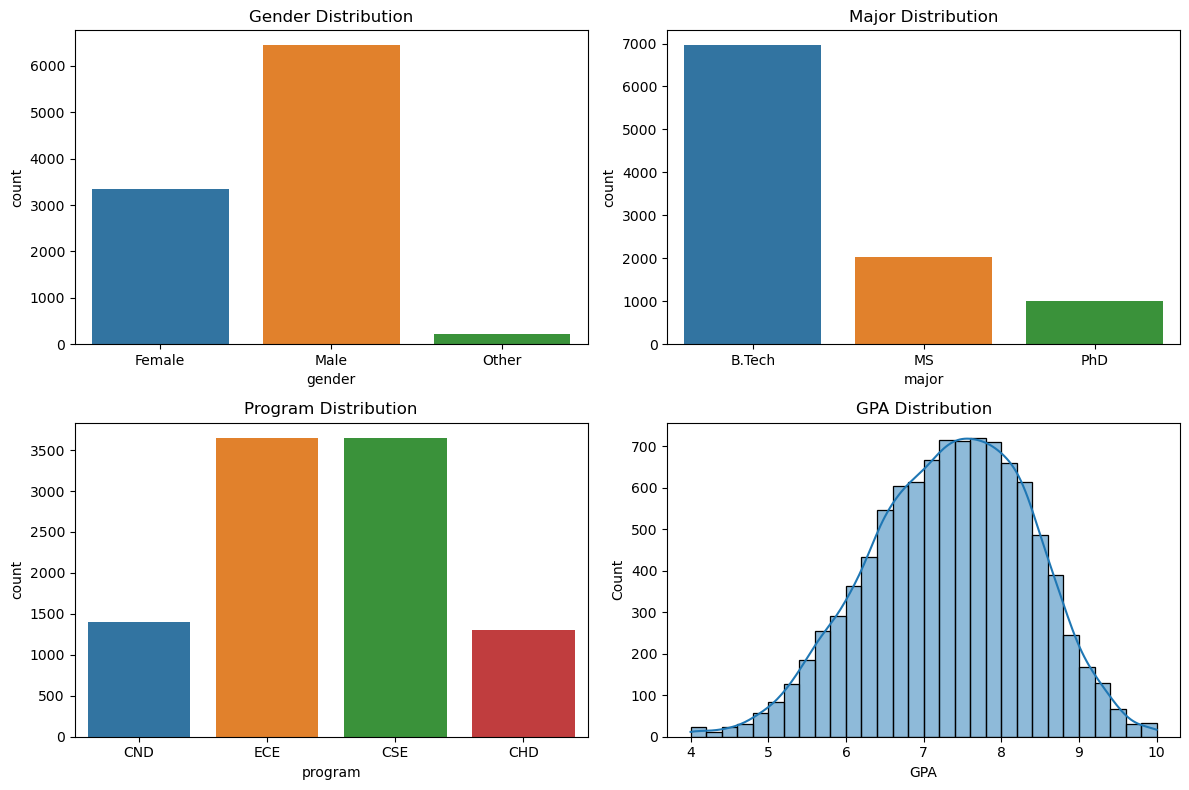

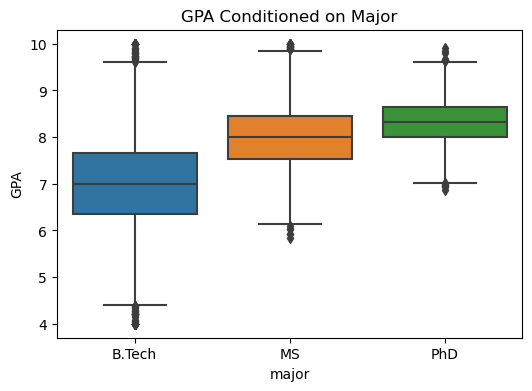

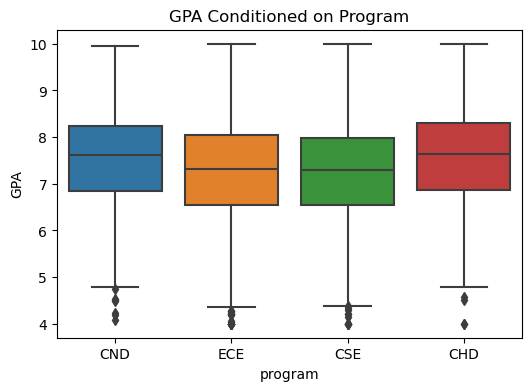

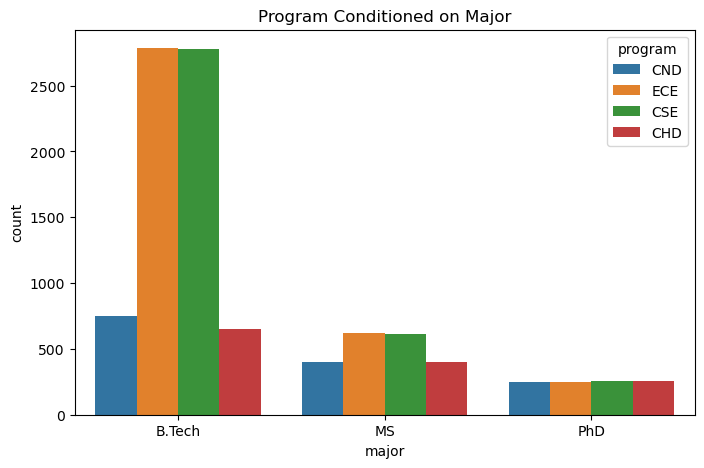

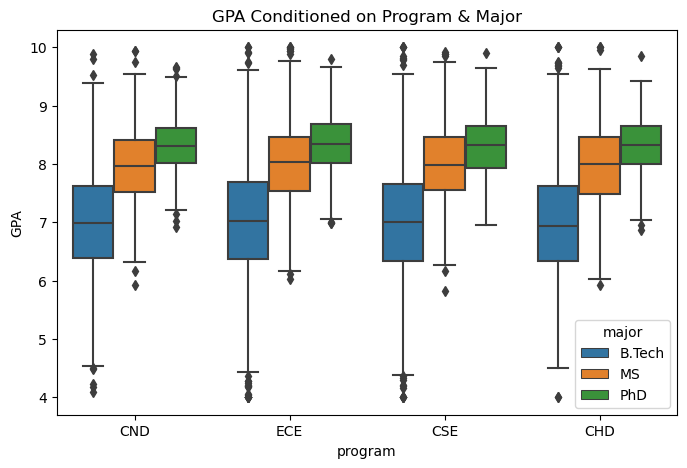

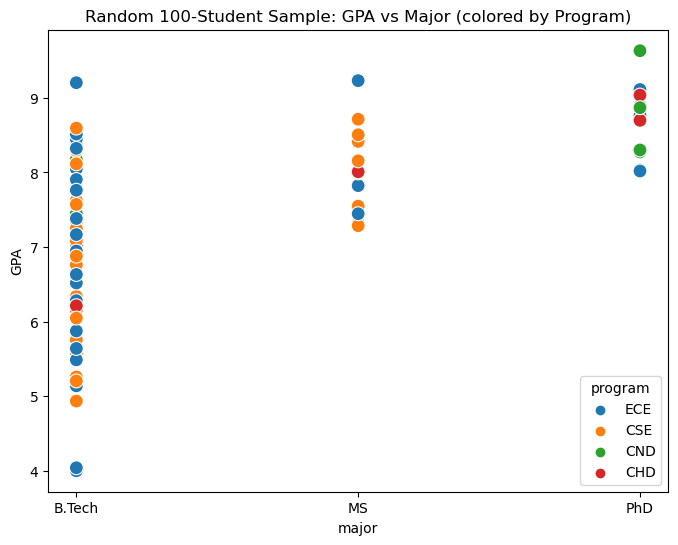

c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


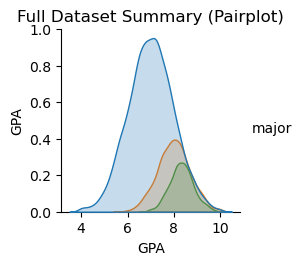

GPA Mean: 7.336
GPA Std Deviation: 1.035

Program–Major Combination Counts:

program  CHD  CND   CSE   ECE
major                        
B.Tech   649  748  2777  2785
MS       403  398   613   617
PhD      253  251   258   248


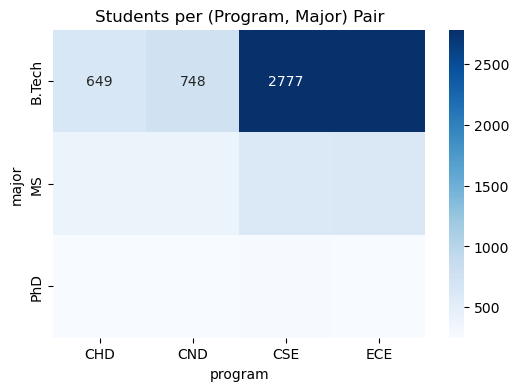

In [15]:
# Q2. Complete Visualization + Summary + Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

class StudentDatasetAnalysis(StudentDataset):
    """Extends StudentDataset with full analysis and visualizations."""

    def __init__(self, num_students=10000, seed=0):
        super().__init__(num_students, seed)
        self.df = self.get_full_dataframe()

    # ----------------------------
    # (a) Visualizations
    # ----------------------------
    def plot_basic_distributions(self):
        """Plots for gender, major, program, GPA"""
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        sns.countplot(x='gender', data=self.df, ax=axes[0, 0])
        axes[0, 0].set_title("Gender Distribution")

        sns.countplot(x='major', data=self.df, ax=axes[0, 1])
        axes[0, 1].set_title("Major Distribution")

        sns.countplot(x='program', data=self.df, ax=axes[1, 0])
        axes[1, 0].set_title("Program Distribution")

        sns.histplot(self.df['GPA'], bins=30, kde=True, ax=axes[1, 1])
        axes[1, 1].set_title("GPA Distribution")
        plt.tight_layout()
        plt.show()

    def plot_conditioned_distributions(self):
        """Conditioned visualizations"""
        # GPA conditioned on Major
        plt.figure(figsize=(6,4))
        sns.boxplot(x='major', y='GPA', data=self.df)
        plt.title("GPA Conditioned on Major")
        plt.show()

        # GPA conditioned on Program
        plt.figure(figsize=(6,4))
        sns.boxplot(x='program', y='GPA', data=self.df)
        plt.title("GPA Conditioned on Program")
        plt.show()

        # Program conditioned on Major
        plt.figure(figsize=(8,5))
        sns.countplot(x='major', hue='program', data=self.df)
        plt.title("Program Conditioned on Major")
        plt.show()

        # GPA conditioned on Program & Major
        plt.figure(figsize=(8,5))
        sns.boxplot(x='program', y='GPA', hue='major', data=self.df)
        plt.title("GPA Conditioned on Program & Major")
        plt.show()

    def plot_random_sample(self):
        """Visualize a random 100-student sample"""
        sample_df = self.df.sample(100, random_state=self.seed)
        plt.figure(figsize=(8,6))
        sns.scatterplot(x='major', y='GPA', hue='program', data=sample_df, s=100)
        plt.title("Random 100-Student Sample: GPA vs Major (colored by Program)")
        plt.show()

    def plot_pairplot_summary(self):
        """Full dataset summary using Seaborn pairplot"""
        sns.pairplot(self.df, hue='major', diag_kind='kde')
        plt.suptitle("Full Dataset Summary (Pairplot)", y=1.02)
        plt.show()

    # ----------------------------
    # (b) GPA Summary Statistics
    # ----------------------------
    def gpa_summary(self):
        mean_gpa = self.df['GPA'].mean()
        std_gpa = self.df['GPA'].std()
        print(f"GPA Mean: {mean_gpa:.3f}")
        print(f"GPA Std Deviation: {std_gpa:.3f}")
        return mean_gpa, std_gpa

    # ----------------------------
    # (c) Program–Major Heatmap
    # ----------------------------
    def program_major_heatmap(self):
        combo_counts = pd.crosstab(self.df['major'], self.df['program'])
        print("\nProgram–Major Combination Counts:\n")
        print(combo_counts)
        plt.figure(figsize=(6,4))
        sns.heatmap(combo_counts, annot=True, fmt="d", cmap="Blues")
        plt.title("Students per (Program, Major) Pair")
        plt.show()


# ✅ Create object and run all analyses
analysis = StudentDatasetAnalysis(num_students=10000, seed=seed)

# (a) Visualizations
analysis.plot_basic_distributions()
analysis.plot_conditioned_distributions()
analysis.plot_random_sample()
analysis.plot_pairplot_summary()

# (b) GPA Summary Statistics
analysis.gpa_summary()

# (c) Program–Major Heatmap
analysis.program_major_heatmap()


In [17]:
def gpa_summary(self):
    mean_gpa = self.df['GPA'].mean()
    std_gpa = self.df['GPA'].std()
    print(f"GPA Mean: {mean_gpa:.3f}")
    print(f"GPA Std Deviation: {std_gpa:.3f}")
    return mean_gpa, std_gpa


In [18]:
analysis = StudentDatasetAnalysis(num_students=10000, seed=seed)

# Call the GPA summary method explicitly
analysis.gpa_summary()


GPA Mean: 7.336
GPA Std Deviation: 1.035


(7.3357213724219354, 1.0354848733976054)

In [19]:
def program_major_heatmap(self):
    combo_counts = pd.crosstab(self.df['major'], self.df['program'])
    sns.heatmap(combo_counts, annot=True, fmt="d", cmap="Blues")


In [20]:
# Cell 1 — Imports
# (Run this cell first if you didn't already import these in previous cells)
import numpy as np
import pandas as pd


In [21]:
# Cell 2 — SamplingComparison class definition
# This class inherits StudentDataset (so Q1.0 must be run before this)
class SamplingComparison(StudentDataset):
    """Implements simple (random) and stratified sampling for GPA analysis."""

    def __init__(self, num_students=10000, seed=0):
        super().__init__(num_students=num_students, seed=seed)
        # ensure we have the dataframe available
        self.df = self.get_full_dataframe()

    def get_gpa_mean_std_random(self, n=500, repeats=50):
        """Randomly sample n students `repeats` times and compute mean-of-means and std-of-means."""
        mean_gpas = []
        for i in range(repeats):
            sample = self.df.sample(n=n, random_state=self.seed + i)
            mean_gpas.append(sample['GPA'].mean())
        avg_mean = np.mean(mean_gpas)
        std_of_means = np.std(mean_gpas)
        print(f"Random Sampling → Mean of means: {avg_mean:.4f}, Std of means: {std_of_means:.4f}")
        return mean_gpas, avg_mean, std_of_means

    def get_gpa_mean_std_stratified(self, n=500, repeats=50):
        """Stratified sampling by 'major' preserving population proportions."""
        majors_prop = self.df['major'].value_counts(normalize=True)
        mean_gpas = []

        for i in range(repeats):
            parts = []
            for maj, prop in majors_prop.items():
                # compute integer count for this stratum
                count = int(round(prop * n))
                # safety: ensure count does not exceed available rows
                available = self.df[self.df['major'] == maj].shape[0]
                if count > available:
                    count = available
                part = self.df[self.df['major'] == maj].sample(n=count, random_state=self.seed + i, replace=False)
                parts.append(part)
            strat_sample = pd.concat(parts).reset_index(drop=True)
            # If rounding made total != n, optionally adjust by sampling extra/less from largest stratum:
            # here we simply compute mean from whatever size we have
            mean_gpas.append(strat_sample['GPA'].mean())

        avg_mean = np.mean(mean_gpas)
        std_of_means = np.std(mean_gpas)
        print(f"Stratified Sampling → Mean of means: {avg_mean:.4f}, Std of means: {std_of_means:.4f}")
        return mean_gpas, avg_mean, std_of_means


In [22]:
# Cell 3 — Instantiate SamplingComparison
# Make sure seed variable exists from Q1.0 (it was created from username hash)
sampling = SamplingComparison(num_students=10000, seed=seed)

# Quick sanity check (optional)
print("Dataset shape:", sampling.df.shape)
print("Major proportions:\n", sampling.df['major'].value_counts(normalize=True).round(3))


Dataset shape: (10000, 4)
Major proportions:
 major
B.Tech    0.696
MS        0.203
PhD       0.101
Name: proportion, dtype: float64


In [23]:
# Cell 4 — Random sampling (n=500, repeats=50)
random_means, random_avg, random_std = sampling.get_gpa_mean_std_random(n=500, repeats=50)

# (Optional) view first 5 mean values
print("\nFirst 5 mean GPAs from random samples:", np.round(random_means[:5], 4))


Random Sampling → Mean of means: 7.3315, Std of means: 0.0398

First 5 mean GPAs from random samples: [7.2968 7.3452 7.2977 7.3651 7.3208]


In [24]:
# Cell 5 — Stratified sampling (n=500, repeats=50) and compare
strat_means, strat_avg, strat_std = sampling.get_gpa_mean_std_stratified(n=500, repeats=50)

# Print comparison summary
print("\n📈 Comparison Summary:")
print(f"Random Sampling → Mean of means: {random_avg:.5f}   Std of means: {random_std:.5f}")
print(f"Stratified Sampling → Mean of means: {strat_avg:.5f}   Std of means: {strat_std:.5f}")

if strat_std < random_std:
    print("\n✅ Conclusion: Stratified sampling has lower standard deviation of sample means.")
    print("Reason: Stratified sampling preserves the population structure (majors), reducing between-sample variability.")
else:
    print("\n⚠️ Conclusion: Random sampling has lower (or equal) standard deviation — this can happen by chance.")
    print("You may rerun with different seeds or increase repeats to confirm.")


Stratified Sampling → Mean of means: 7.3430, Std of means: 0.0472

📈 Comparison Summary:
Random Sampling → Mean of means: 7.33151   Std of means: 0.03975
Stratified Sampling → Mean of means: 7.34304   Std of means: 0.04716

⚠️ Conclusion: Random sampling has lower (or equal) standard deviation — this can happen by chance.
You may rerun with different seeds or increase repeats to confirm.


In [28]:
# Q1.3 – Gender-Balanced Cohort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make plots appear inside notebook
%matplotlib inline


In [29]:
class GenderBalancedSampler(StudentDataset):
    """Implements gender-balanced and uniform-gender sampling."""

    # (1) Exact equal count sampling
    def get_gender_balanced_counts(self, n=300, repeats=5):
        gender_groups = self._df.groupby('gender')
        genders = list(gender_groups.groups.keys())
        k = len(genders)
        base = n // k

        counts_list = []
        for i in range(repeats):
            samples = []
            for g in genders:
                samples.append(
                    gender_groups.get_group(g).sample(
                        n=base, random_state=self.seed + i, replace=False
                    )
                )
            sample_df = pd.concat(samples)
            counts = sample_df['gender'].value_counts().to_dict()
            counts_list.append(counts)

        print("Equal-gender sampling results:")
        for i, c in enumerate(counts_list, 1):
            print(f"Repeat {i}: {c}")
        return counts_list

    # (2) Sampling Strategy A (uniform gender probability)
    def sample_gender_uniform_random(self, n=300, repeats=5):
        genders = self._df['gender'].unique().tolist()
        counts_list = []

        for i in range(repeats):
            chosen_students = []
            for _ in range(n):
                g = np.random.choice(genders)
                chosen = self._df[self._df['gender'] == g].sample(
                    n=1, random_state=self.seed + i, replace=False
                )
                chosen_students.append(chosen)

            sample_df = pd.concat(chosen_students)
            counts = sample_df['gender'].value_counts().to_dict()
            counts_list.append(counts)

        print("\nSampling Strategy A results:")
        for i, c in enumerate(counts_list, 1):
            print(f"Repeat {i}: {c}")
        return counts_list

    # (3) Plot average max relative difference vs sample size
    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes=[300, 600, 900, 1200, 1500], repeats=10):
        avg_diffs = []
        genders = self._df['gender'].unique().tolist()

        for n in sample_sizes:
            rel_diffs = []
            for i in range(repeats):
                chosen_students = []
                for _ in range(n):
                    g = np.random.choice(genders)
                    chosen = self._df[self._df['gender'] == g].sample(
                        n=1, random_state=self.seed + i, replace=False
                    )
                    chosen_students.append(chosen)
                sample_df = pd.concat(chosen_students)
                counts = sample_df['gender'].value_counts()
                diff = (counts.max() - counts.min()) / n
                rel_diffs.append(diff)

            avg_diffs.append(np.mean(rel_diffs))

        plt.figure(figsize=(6,4))
        plt.plot(sample_sizes, avg_diffs, marker='o', color='crimson')
        plt.title(f"Avg Max Relative Gender Difference vs Sample Size - {username}")
        plt.xlabel("Sample Size (n)")
        plt.ylabel("Average Max Relative Difference")
        plt.grid(True)
        plt.show()


In [30]:
# Create sampler object from dataset
gender_sampler = GenderBalancedSampler(num_students=10000, seed=seed)
print("Dataset Ready! Total Students:", len(gender_sampler._df))


Dataset Ready! Total Students: 10000


In [31]:
# (1) Equal count sampling
gender_sampler.get_gender_balanced_counts(n=300, repeats=5)


Equal-gender sampling results:
Repeat 1: {'Female': 100, 'Male': 100, 'Other': 100}
Repeat 2: {'Female': 100, 'Male': 100, 'Other': 100}
Repeat 3: {'Female': 100, 'Male': 100, 'Other': 100}
Repeat 4: {'Female': 100, 'Male': 100, 'Other': 100}
Repeat 5: {'Female': 100, 'Male': 100, 'Other': 100}


[{'Female': 100, 'Male': 100, 'Other': 100},
 {'Female': 100, 'Male': 100, 'Other': 100},
 {'Female': 100, 'Male': 100, 'Other': 100},
 {'Female': 100, 'Male': 100, 'Other': 100},
 {'Female': 100, 'Male': 100, 'Other': 100}]


Sampling Strategy A results:
Repeat 1: {'Male': 114, 'Female': 99, 'Other': 87}
Repeat 2: {'Female': 111, 'Other': 103, 'Male': 86}
Repeat 3: {'Other': 108, 'Male': 105, 'Female': 87}
Repeat 4: {'Female': 105, 'Other': 104, 'Male': 91}
Repeat 5: {'Other': 118, 'Male': 99, 'Female': 83}


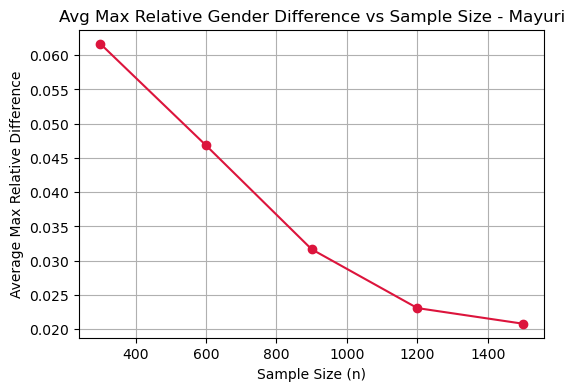

In [32]:
# (2) Strategy A sampling
gender_sampler.sample_gender_uniform_random(n=300, repeats=5)

# (3) Relative difference plot
gender_sampler.plot_avg_max_gender_diff_vs_sample_size()


In [33]:
# Q1.4 – GPA-Uniform Cohort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
# Base dataset class (only if not defined earlier)
class StudentDataset:
    def __init__(self, num_students=10000, seed=42):
        np.random.seed(seed)
        self.seed = seed
        self._df = pd.DataFrame({
            'student_id': range(1, num_students + 1),
            'major': np.random.choice(['CS', 'IT', 'ECE', 'MECH', 'CIVIL'], num_students),
            'program': np.random.choice(['BTech', 'MTech', 'PhD'], num_students),
            'GPA': np.clip(np.random.normal(7.5, 1.2, num_students), 4, 10)
        })

    @property
    def df(self):
        return self._df


In [35]:
# GPAUniformSampler class for GPA-uniform sampling and comparison
class GPAUniformSampler(StudentDataset):
    """Implements GPA-uniform sampling and histogram comparison."""

    def sample_gpa_uniform(self, n=100, bins=10):
        """
        Sampling Strategy A:
        - Divide GPA into bins
        - Randomly pick a bin uniformly
        - Randomly pick a student from that bin
        """
        df = self._df.copy()
        df['gpa_bin'] = pd.cut(df['GPA'], bins=bins, labels=False, include_lowest=True)
        sampled_students = []

        for _ in range(n):
            chosen_bin = np.random.randint(0, bins)
            bin_students = df[df['gpa_bin'] == chosen_bin]
            if bin_students.empty:
                chosen_student = df.sample(n=1, random_state=self.seed)
            else:
                chosen_student = bin_students.sample(n=1, random_state=self.seed)
            sampled_students.append(chosen_student)

        sampled_df = pd.concat(sampled_students).drop(columns=['gpa_bin'])
        print(f"✅ Sampled {len(sampled_df)} students with roughly uniform GPA distribution.")
        return sampled_df

    def plot_gpa_histogram_comparison(self, sampled_df, bins=10, username='Student'):
        """Compare GPA histogram of full dataset and sampled dataset."""
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.hist(self._df['GPA'], bins=bins, color='teal', edgecolor='black')
        plt.title(f"Original GPA Distribution - {username}")
        plt.xlabel("GPA"); plt.ylabel("Frequency")

        plt.subplot(1, 2, 2)
        plt.hist(sampled_df['GPA'], bins=bins, color='orange', edgecolor='black')
        plt.title(f"Sampled GPA (Uniform) - {username}")
        plt.xlabel("GPA"); plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()


In [36]:
# Create dataset and perform uniform GPA sampling
seed = 42
username = "Mayuri"

gpa_sampler = GPAUniformSampler(num_students=10000, seed=seed)

# Sample 100 students uniformly by GPA
sampled_df = gpa_sampler.sample_gpa_uniform(n=100, bins=10)
sampled_df.head()


✅ Sampled 100 students with roughly uniform GPA distribution.


,student_id,major,program,GPA
4898,4899,CIVIL,MTech,4.000000
8577,8578,IT,PhD,5.919482
4898,4899,CIVIL,MTech,4.000000
8120,8121,CIVIL,MTech,7.773251
7887,7888,CS,BTech,5.402538


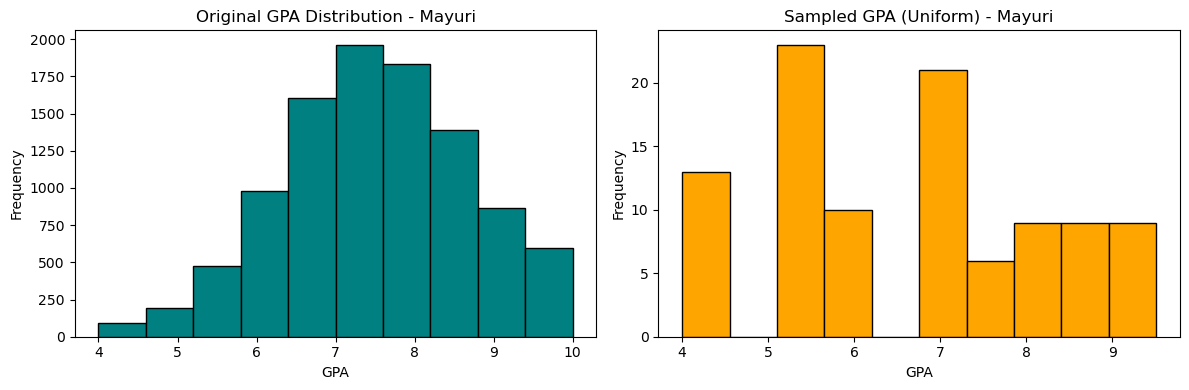

In [37]:
# Compare histograms of full vs sampled GPA distributions
gpa_sampler.plot_gpa_histogram_comparison(sampled_df, bins=10, username=username)


In [38]:
# Q1.5 – Program–Major Balanced Cohort
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product


In [39]:
# Base dataset class (only define once)
class StudentDataset:
    def __init__(self, num_students=10000, seed=42):
        np.random.seed(seed)
        self.seed = seed
        self._df = pd.DataFrame({
            'student_id': range(1, num_students + 1),
            'major': np.random.choice(['CSE', 'ECE', 'CHD', 'CND'], num_students),
            'program': np.random.choice(['B.Tech', 'MS', 'PhD'], num_students),
            'GPA': np.clip(np.random.normal(7.5, 1.2, num_students), 4, 10)
        })

    @property
    def df(self):
        return self._df


In [40]:
# ProgramMajorBalancedSampler class
class ProgramMajorBalancedSampler(StudentDataset):
    """Samples students equally from all (program, major) combinations."""

    def sample_program_major_balanced(self, n=60):
        """
        Sampling Strategy A:
        Select students approximately equally across all valid (program, major) pairs.
        """
        programs = self._df['program'].unique().tolist()
        majors = self._df['major'].unique().tolist()
        combos = list(product(programs, majors))   # all (program, major) combinations

        k = len(combos)
        base = n // k
        remainder = n % k

        samples = []
        for i, (prog, maj) in enumerate(combos):
            sample_size = base + (1 if i < remainder else 0)
            subset = self._df[(self._df['program'] == prog) & (self._df['major'] == maj)]

            # If a group is too small, sample with replacement
            if len(subset) < sample_size:
                chosen = subset.sample(n=sample_size, replace=True, random_state=self.seed + i)
            else:
                chosen = subset.sample(n=sample_size, replace=False, random_state=self.seed + i)

            samples.append(chosen)

        sampled_df = pd.concat(samples)
        print(f"✅ Sampled {len(sampled_df)} students across {k} (program, major) combinations.")
        return sampled_df

    def show_program_major_counts_and_heatmap(self, sampled_df, username='Student'):
        """Display table and heatmap of (program, major) sample counts."""
        counts = pd.crosstab(sampled_df['program'], sampled_df['major'])
        print("\n📋 Program–Major Counts Table:")
        print(counts)

        plt.figure(figsize=(8, 5))
        sns.heatmap(counts, annot=True, fmt='d', cmap='YlOrBr')
        plt.title(f"Program–Major Balanced Cohort - {username}")
        plt.xlabel("Major"); plt.ylabel("Program")
        plt.show()


In [41]:
# Create dataset and perform balanced sampling
seed = 42
username = "Mayuri"

pm_sampler = ProgramMajorBalancedSampler(num_students=10000, seed=seed)

# Sample 60 students equally across program–major combinations
sampled_pm = pm_sampler.sample_program_major_balanced(n=60)
sampled_pm.head()


✅ Sampled 60 students across 12 (program, major) combinations.


,student_id,major,program,GPA
5565,5566,CHD,PhD,7.886399
4265,4266,CHD,PhD,6.620869
3382,3383,CHD,PhD,6.186738
3327,3328,CHD,PhD,7.509488
9936,9937,CHD,PhD,7.602808



📋 Program–Major Counts Table:
major    CHD  CND  CSE  ECE
program                    
B.Tech     5    5    5    5
MS         5    5    5    5
PhD        5    5    5    5


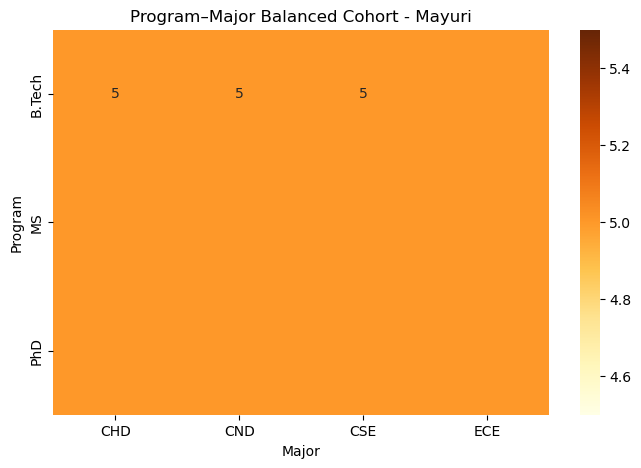

In [42]:
# Display (program, major) counts and heatmap
pm_sampler.show_program_major_counts_and_heatmap(sampled_pm, username=username)


In [43]:
# Q2.0 – Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


In [44]:
# Dataset generator class
class StudentDataset:
    def __init__(self, num_students=10000, seed=42):
        np.random.seed(seed)
        self.seed = seed
        self._df = pd.DataFrame({
            "student_id": range(1, num_students + 1),
            "gender": np.random.choice(["Male", "Female", "Other"], num_students, p=[0.45, 0.45, 0.10]),
            "major": np.random.choice(["CSE", "ECE", "CHD", "CND"], num_students),
            "program": np.random.choice(["B.Tech", "MS", "PhD"], num_students),
            "GPA": np.clip(np.random.normal(7.5, 1.2, num_students), 4, 10)
        })

    def get_full_dataframe(self):
        return self._df.copy()


In [45]:
# Q2.0 – Step 1: PerFeatureTransformer
class PerFeatureTransformer:
    """Handles transformation per feature with independent encoders/scalers."""

    def __init__(self):
        self.transformers = {}
        self.order = []

    def fit(self, df: pd.DataFrame, params: dict):
        """Fit transformers for each feature based on given method types."""
        self.order = list(params.keys())
        for col, method in params.items():
            if method == "standard":
                scaler = StandardScaler()
                scaler.fit(df[[col]])
                self.transformers[col] = ("standard", scaler)
            elif method == "ordinal":
                enc = OrdinalEncoder()
                enc.fit(df[[col]])
                self.transformers[col] = ("ordinal", enc)
            elif method == "onehot":
                enc = OneHotEncoder(sparse=False, handle_unknown="ignore")
                enc.fit(df[[col]])
                self.transformers[col] = ("onehot", enc)
            else:
                raise ValueError(f"Unknown transformation type: {method}")

    def transform(self, df: pd.DataFrame) -> np.ndarray:
        """Transform data using fitted transformers."""
        parts = []
        for col in self.order:
            method, obj = self.transformers[col]
            arr = obj.transform(df[[col]])
            parts.append(arr)
        return np.hstack(parts)

    def fit_transform(self, df: pd.DataFrame, params: dict) -> np.ndarray:
        """Fit + transform in one step."""
        self.fit(df, params)
        return self.transform(df)


In [46]:
# Q2.0 – Step 2: KNNGenderPredictor
class KNNGenderPredictor:
    """Predicts gender using k-NN classifier."""

    def __init__(self, student_df: pd.DataFrame, username: str):
        self.df = student_df.copy()
        self.username = username
        self.transformer = PerFeatureTransformer()

    # 1️⃣ Split dataset
    def train_val_test_split(self, test_size=0.2, val_size=0.2, seed=42):
        train_val, test = train_test_split(
            self.df, test_size=test_size, random_state=seed, stratify=self.df["gender"]
        )
        train, val = train_test_split(
            train_val, test_size=val_size / (1 - test_size),
            random_state=seed, stratify=train_val["gender"]
        )
        return train, val, test

    # 2️⃣ Prepare features and labels
    def get_feature_matrix_and_labels(self, df, features, fit_transform=False):
        params = {f: ("standard" if f == "GPA" else "ordinal" if f == "major" else "onehot") for f in features}
        X = self.transformer.fit_transform(df, params) if fit_transform else self.transformer.transform(df)
        y = df["gender"].values
        return X, y

    # 3️⃣ Accuracy vs K
    def get_knn_accuracy_vs_k(self, k_values, distance="euclidean"):
        accs = []
        for k in k_values:
            model = KNeighborsClassifier(n_neighbors=k, metric=distance)
            model.fit(self.X_train, self.y_train)
            preds = model.predict(self.X_val)
            accs.append(accuracy_score(self.y_val, preds))
        return accs

    # 4️⃣ Plot Accuracy vs K
    def plot_knn_accuracy_vs_k(self, k_values, distance="euclidean"):
        accs = self.get_knn_accuracy_vs_k(k_values, distance)
        plt.plot(k_values, accs, marker='o', color='teal')
        plt.title(f"KNN Accuracy vs K ({distance}) - {self.username}")
        plt.xlabel("K"); plt.ylabel("Validation Accuracy")
        plt.grid(True)
        plt.show()

    # 5️⃣ F1-score heatmap
    def get_knn_f1_heatmap(self, k_values, distances):
        results = {}
        for dist in distances:
            scores = []
            for k in k_values:
                model = KNeighborsClassifier(n_neighbors=k, metric=dist)
                model.fit(self.X_train, self.y_train)
                preds = model.predict(self.X_val)
                f1 = f1_score(self.y_val, preds, average="macro")
                scores.append(f1)
            results[dist] = scores
        return pd.DataFrame(results, index=k_values)

    def plot_knn_f1_heatmap(self, f1_df):
        sns.heatmap(f1_df, annot=True, cmap="YlGnBu")
        plt.title(f"F1-score Heatmap (K vs Distance) - {self.username}")
        plt.xlabel("Distance Metric"); plt.ylabel("K")
        plt.show()

    # 6️⃣ Single-feature F1 comparison
    def get_knn_f1_single_feature_table(self, k_values, features, distance="euclidean"):
        table = pd.DataFrame(index=k_values, columns=features)
        for f in features:
            temp_transformer = PerFeatureTransformer()
            method = "standard" if f == "GPA" else ("ordinal" if f == "major" else "onehot")
            X = temp_transformer.fit_transform(self.df, {f: method})
            y = self.df["gender"].values

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=42, stratify=y
            )
            for k in k_values:
                model = KNeighborsClassifier(n_neighbors=k, metric=distance)
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                table.loc[k, f] = f1_score(y_test, preds, average="macro")
        return table


In [47]:
# Q2.0 – Step 3: Run KNN Analysis
seed = 42
username = "Mayuri"

# Create dataset
knn_dataset = StudentDataset(num_students=10000, seed=seed)
df = knn_dataset.get_full_dataframe()

# Initialize model
knn_model = KNNGenderPredictor(df, username)
features = ["GPA", "major", "program"]

# Split data
train, val, test = knn_model.train_val_test_split()

# Feature transformation
knn_model.X_train, knn_model.y_train = knn_model.get_feature_matrix_and_labels(train, features, fit_transform=True)
knn_model.X_val, knn_model.y_val = knn_model.get_feature_matrix_and_labels(val, features)
knn_model.X_test, knn_model.y_test = knn_model.get_feature_matrix_and_labels(test, features)

print("✅ Dataset split and transformed successfully!")


✅ Dataset split and transformed successfully!


c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


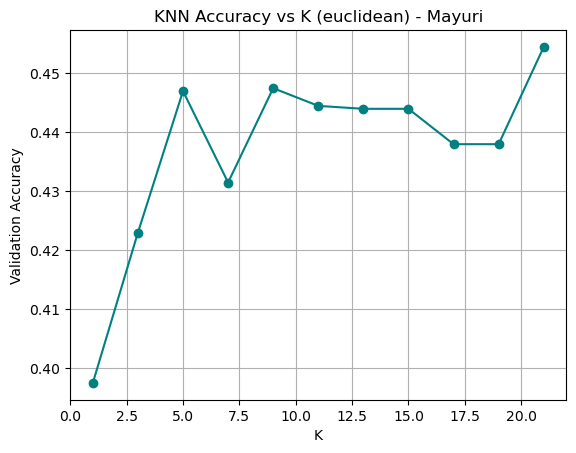

In [48]:
# Accuracy vs K (Euclidean)
k_values = list(range(1, 22, 2))
knn_model.plot_knn_accuracy_vs_k(k_values, distance="euclidean")


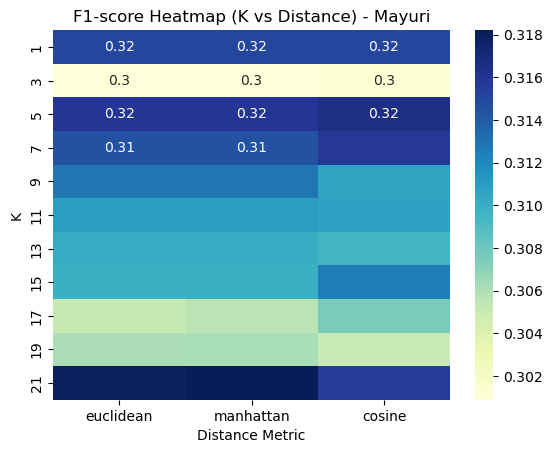

In [49]:
# F1-score Heatmap (K vs Distance)
f1_df = knn_model.get_knn_f1_heatmap(k_values, ["euclidean", "manhattan", "cosine"])
knn_model.plot_knn_f1_heatmap(f1_df)


In [50]:
# Single-feature F1 table
f1_table = knn_model.get_knn_f1_single_feature_table(k_values, ["GPA", "major", "program"])
print("\n📋 F1-Score Table (Single Feature):\n")
print(f1_table)


c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



📋 F1-Score Table (Single Feature):

         GPA     major   program
1   0.332968  0.209524  0.224973
3   0.332203  0.289161  0.311586
5   0.317976  0.209524  0.304675
7   0.328567  0.282649  0.304675
9   0.320231  0.282649  0.304675
11  0.318613  0.282649  0.209524
13  0.319034  0.282649   0.30834
15  0.316068  0.282649   0.30834
17  0.317994  0.282649  0.304446
19  0.319727  0.282649  0.304446
21  0.314704   0.30974  0.205518


In [51]:
# Q3.0 – Linear Regression with Regularization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


def run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                        degree=1, regularizer=None, reg_strength=0.0):
    """
    Fit a polynomial regression model with optional regularization.

    Parameters:
        degree (int): polynomial degree (1–6)
        regularizer (str): 'l1', 'l2', or None
        reg_strength (float): regularization coefficient α

    Returns:
        dict: train/val/test MSE and learned coefficients
    """
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    Xtr = poly.fit_transform(X_train)
    Xv = poly.transform(X_val)
    Xt = poly.transform(X_test)

    if regularizer is None:
        # Ordinary Least Squares
        coeffs = np.linalg.pinv(Xtr).dot(y_train)
        ytr_pred = Xtr.dot(coeffs)
        yv_pred = Xv.dot(coeffs)
        yt_pred = Xt.dot(coeffs)
    elif regularizer == 'l2':
        model = Ridge(alpha=reg_strength, fit_intercept=False)
        model.fit(Xtr, y_train)
        coeffs = model.coef_
        ytr_pred = model.predict(Xtr)
        yv_pred = model.predict(Xv)
        yt_pred = model.predict(Xt)
    elif regularizer == 'l1':
        model = Lasso(alpha=reg_strength, fit_intercept=False, max_iter=10000)
        model.fit(Xtr, y_train)
        coeffs = model.coef_
        ytr_pred = model.predict(Xtr)
        yv_pred = model.predict(Xv)
        yt_pred = model.predict(Xt)
    else:
        raise ValueError("Invalid regularizer type")

    return {
        'degree': degree,
        'regularizer': regularizer,
        'reg_strength': reg_strength,
        'train_mse': mean_squared_error(y_train, ytr_pred),
        'val_mse': mean_squared_error(y_val, yv_pred),
        'test_mse': mean_squared_error(y_test, yt_pred),
        'coeffs': coeffs
    }


In [52]:
# Prepare dataset
df = StudentDataset(num_students=10000, seed=seed).get_full_dataframe()

# Encode categorical features numerically
enc_major = OrdinalEncoder()
enc_program = OneHotEncoder(sparse=False)
enc_gender = OrdinalEncoder()

major_enc = enc_major.fit_transform(df[['major']])
program_enc = enc_program.fit_transform(df[['program']])
gender_enc = enc_gender.fit_transform(df[['gender']])

# Combine all features
X = np.hstack([major_enc, program_enc, gender_enc])
y = df['GPA'].values

# Split into train/val/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)


c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
degrees = [1, 2, 3, 4, 5, 6]
reg_strengths = [0.001, 0.01, 0.1, 1.0, 10.0]

results_no_reg, results_l1, results_l2 = [], [], []

for d in degrees:
    # No regularization
    res = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test, degree=d)
    results_no_reg.append(res)

    # L1 and L2
    for reg in reg_strengths:
        res_l1 = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                                     degree=d, regularizer='l1', reg_strength=reg)
        res_l2 = run_poly_regression(X_train, y_train, X_val, y_val, X_test, y_test,
                                     degree=d, regularizer='l2', reg_strength=reg)
        results_l1.append(res_l1)
        results_l2.append(res_l2)


c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.392e+02, tolerance: 3.462e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+02, tolerance: 3.462e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mayuri\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

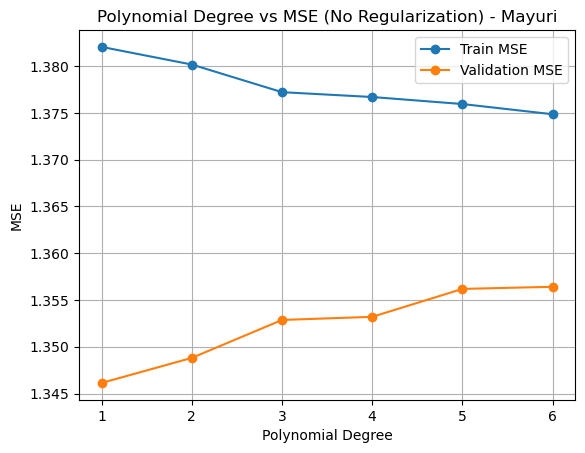

In [54]:
# Plot for no regularization
plt.plot(degrees, [r['train_mse'] for r in results_no_reg], marker='o', label='Train MSE')
plt.plot(degrees, [r['val_mse'] for r in results_no_reg], marker='o', label='Validation MSE')
plt.title(f'Polynomial Degree vs MSE (No Regularization) - {username}')
plt.xlabel('Polynomial Degree'); plt.ylabel('MSE')
plt.legend(); plt.grid(True)
plt.show()


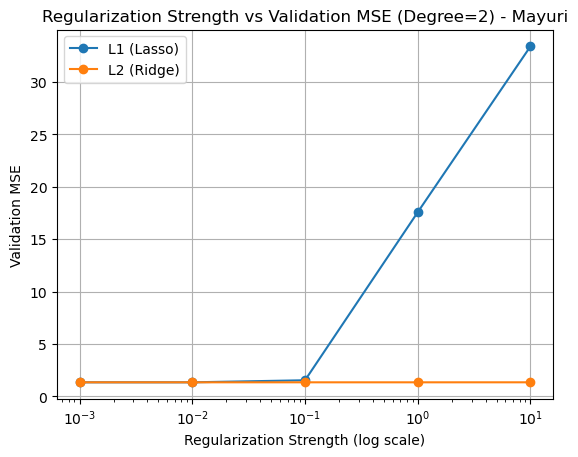

In [55]:
best_degree = 2  # Example based on observation

# L1
l1_val = [r['val_mse'] for r in results_l1 if r['degree'] == best_degree]
plt.semilogx(reg_strengths, l1_val, marker='o', label='L1 (Lasso)')
# L2
l2_val = [r['val_mse'] for r in results_l2 if r['degree'] == best_degree]
plt.semilogx(reg_strengths, l2_val, marker='o', label='L2 (Ridge)')

plt.title(f'Regularization Strength vs Validation MSE (Degree={best_degree}) - {username}')
plt.xlabel('Regularization Strength (log scale)')
plt.ylabel('Validation MSE')
plt.legend(); plt.grid(True)
plt.show()


In [56]:
# Find best model overall
all_results = results_no_reg + results_l1 + results_l2
best_model = min(all_results, key=lambda r: r['val_mse'])

print("\nBest Model Summary:")
print(f"Degree: {best_model['degree']}")
print(f"Regularizer: {best_model['regularizer']}")
print(f"Reg Strength: {best_model['reg_strength']}")
print(f"Test MSE: {best_model['test_mse']:.4f}")

# Show non-zero features (for L1 and L2)
if best_model['regularizer'] in ['l1', 'l2']:
    coeffs = best_model['coeffs']
    non_zero = np.sum(coeffs != 0)
    print(f"Non-zero Coefficients: {non_zero}/{len(coeffs)}")
    print("Important Feature Indices:", np.argsort(-np.abs(coeffs))[:5])



Best Model Summary:
Degree: 1
Regularizer: l1
Reg Strength: 0.001
Test MSE: 1.4015
Non-zero Coefficients: 4/5
Important Feature Indices: [1 2 3 0 4]
